# Modelos de Poblaciones

Claudia Yetlanezi Meneses Ramírez - 154221

El modelo Ricker es un modelo de población discreto clásico que da el número esperado N t +1 (o densidad) de individuos en la generación t + 1 en función del número de individuos en la generación anterior.

$$ N_ {t + 1} = N_ {t} e ^ { r (1 - \frac{N_ {t}}{k} )}$$


Donde $r$ se interpreta como una tasa de crecimiento intrínseca y $k$ como la capacidad de carga del medio ambiente.

El modelo posee dos puntos de equilibrio: N* = 0 y N* = 100, cuya estabilidad depende del valor de r. En particular, para N* = 100 se tiene:

**( i )**   r < 2, hay equilibrio estable.

**( ii )**  r = 2, hay una bifurcación en un 2-ciclo.

**( iii )** r = 2.5, hay una bifurcación en un 4-ciclo.

**( iv )** luego hay una serie de doblamiento en 8-ciclos, 16-ciclos, etc.

**( v )**  r = 2.692, hay una caída al caos.

**( vi )** r >2.7 hay algunas regiones en donde la dinámica vuelva a tener ciclos límites.



A continuación se ilustra el comportamiento dinámico descrito anteriormente. Suponiendo que K = 100.


In [44]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [45]:
def model(n,t0,m0,dt,r,K):
# n : número de iteraciones +1
#t0 : tiempo inicial
#m0 : población inicial
#dt : cambio de tiempo
#r  : parámetro del modelo *parámetro que determina la bifurcación
#K : Capacidad de carga

    rickter = np.zeros((n,2))
    rickter[0,0] = t0
    rickter[0,1] = m0
    for i in range(n-1):
        rickter[i+1,0] = rickter[i,0] + dt
        rickter[i+1,1] = rickter[i,1]*( np.exp( r*( 1- rickter[i,1]/K ) ) )
        
    plt.plot(rickter[:,0],rickter[:,1],"ko") 
    plt.title("Crecimiento de Rickter")
    plt.xlabel("Tiempo")
    plt.ylabel("Población")
    plt.show() 
    
    step = ( np.max(rickter[:,1]) - min(rickter[:,1]) ) / n
    
    for i in range(n-2):
        plt.plot(rickter[i,1],rickter[i+1,1],'ko')
        plt.plot(rickter[0,1] + (i+1)*step, rickter[0,1] + (i+1)*step,'b*')
        
    plt.title("Diagrama fase")
    plt.xlabel(" N(t) ")
    plt.ylabel(" N(t+1)")
    plt.show()      

In [46]:
#Parámetros de prueba

#número de iteraciones +1
n= 90
#tiempo inicial
t0=0 
#población inicial
m0=20
#cambio entre tiempos
dt = 0.05
#capacidad de carga
K = 100

Para $r = 0.5$

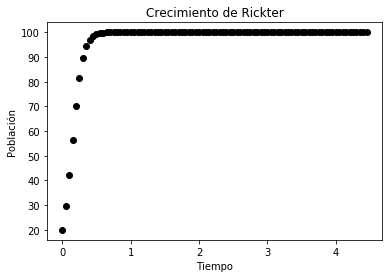

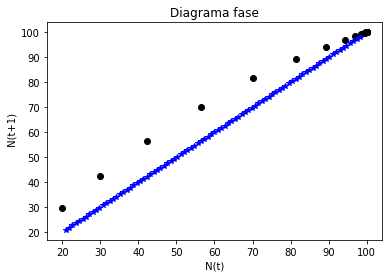

In [47]:
model(n,t0,m0,dt,0.5,K)

Para $r = 1.5 $

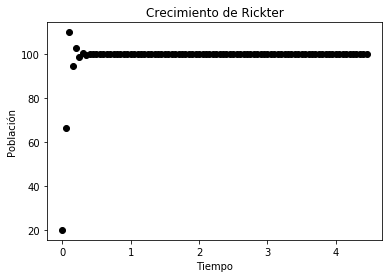

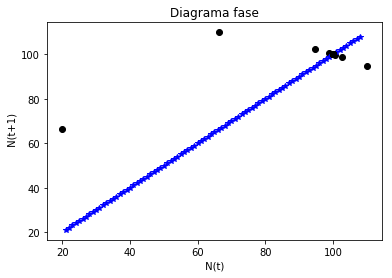

In [48]:
model(n,t0,m0,dt,1.5,K)

Para $r = 2.1$

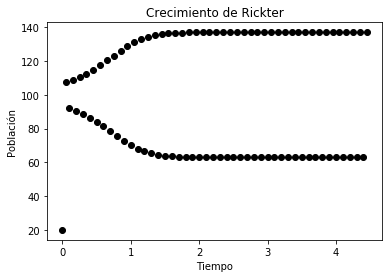

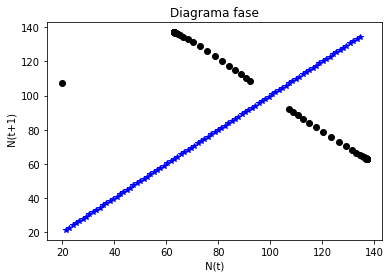

In [49]:
model(n,t0,m0,dt,2.1,K)

Para $r = 3$

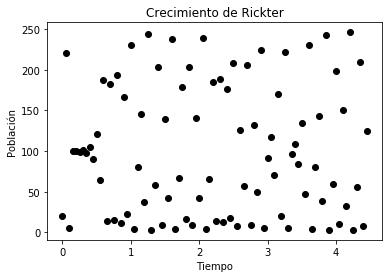

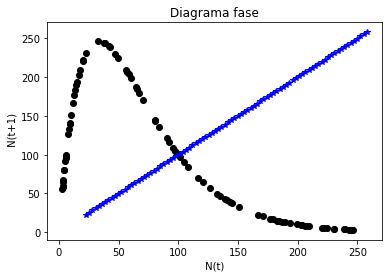

In [50]:
model(n,t0,m0,dt,3,K)

A continuación se presenta el diagrama de bifurcación de r. Se tomó $0 < r < 4.2$

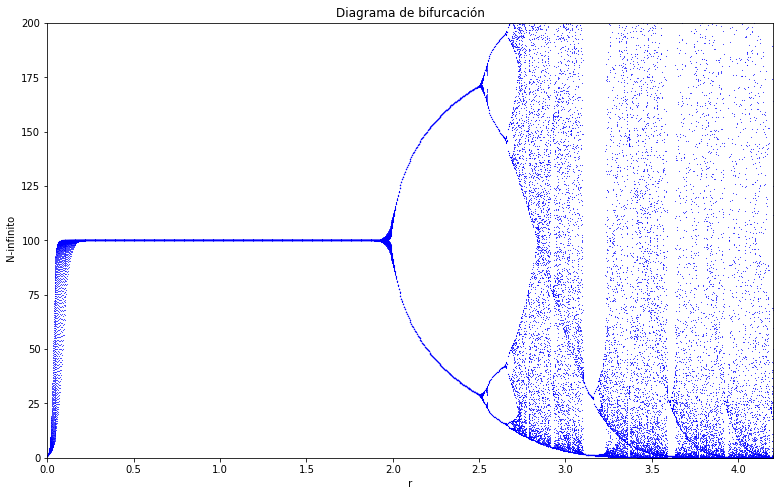

In [51]:
def f(c,x): return x*( np.exp( c*( 1- x/100 ) ) )

ax = plt.subplot(1,1,1)
ax.set_xlim(0,4.2)
ax.set_ylim(0,200)
c_data = []
x_data = []
for c in np.linspace(0,4.2,800):
    x = 1
    for i in range(50):
        x = f(c,x)
    for i in range(100):
        x = f(c,x)
        c_data.append(c)
        x_data.append(x)

plt.plot(c_data,x_data,'b*', alpha=0.7, markersize=0.3)
plt.title("Diagrama de bifurcación")
plt.xlabel(" r ")
plt.ylabel(" N-infinito")

fig = ax.figure
fig.set_figwidth(13)
fig.set_figheight(8)